In [3]:
import plot_utils
from plot_utils import Roller,LogFile,Fig,LogFileType
import rolling_funcs as fn

WINDOW_LEN_SECS = 20.0

/var/folders/82/6xch38_95_d545t14cp867pc0000gr/T/ipykernel_91618/3672008616.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


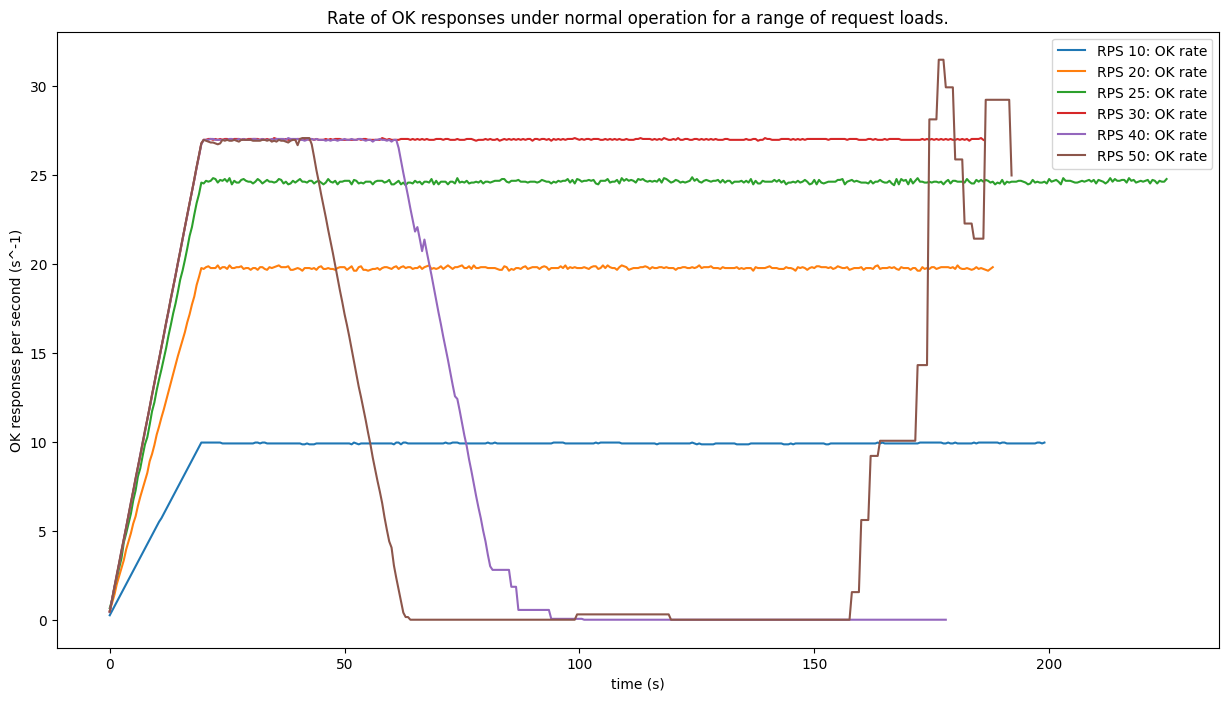

In [4]:
log_files = {
    "RPS 10" : LogFile(log_type=LogFileType.GOT, path="./logs/kleene/2024-10-28_13-44-55.433930.txt"),
    "RPS 20" : LogFile(log_type=LogFileType.GOT, path="./logs/kleene/2024-10-28_13-49-18.928926.txt"),
    "RPS 25" : LogFile(log_type=LogFileType.GOT, path="./logs/kleene/2024-10-28_14-09-30.488833.txt"),
    "RPS 30" : LogFile(log_type=LogFileType.GOT, path="./logs/kleene/2024-10-28_13-53-30.087870.txt"),
    "RPS 40" : LogFile(log_type=LogFileType.GOT, path="./logs/kleene/2024-10-28_13-57-54.831539.txt"),
    "RPS 50" : LogFile(log_type=LogFileType.GOT, path="./logs/kleene/2024-10-28_14-05-07.122868.txt"),
}
rollers = [
    Roller("OK rate", fn.count_ok, rate=True),
]

fig,ax = plot_utils.fig([Fig(title='Rate of OK responses under normal operation for a range of request loads.', x='time (s)', y='OK responses per second (s^-1)')])
plot_utils.overlay_rolling(ax,log_files,rollers,window_secs=WINDOW_LEN_SECS, const_stride_secs=0.5, zeroed_times=True)
ax.legend()
# ax.set_xlim(WINDOW_LEN_SECS)
fig.show()

/var/folders/82/6xch38_95_d545t14cp867pc0000gr/T/ipykernel_91618/1482743066.py:30: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


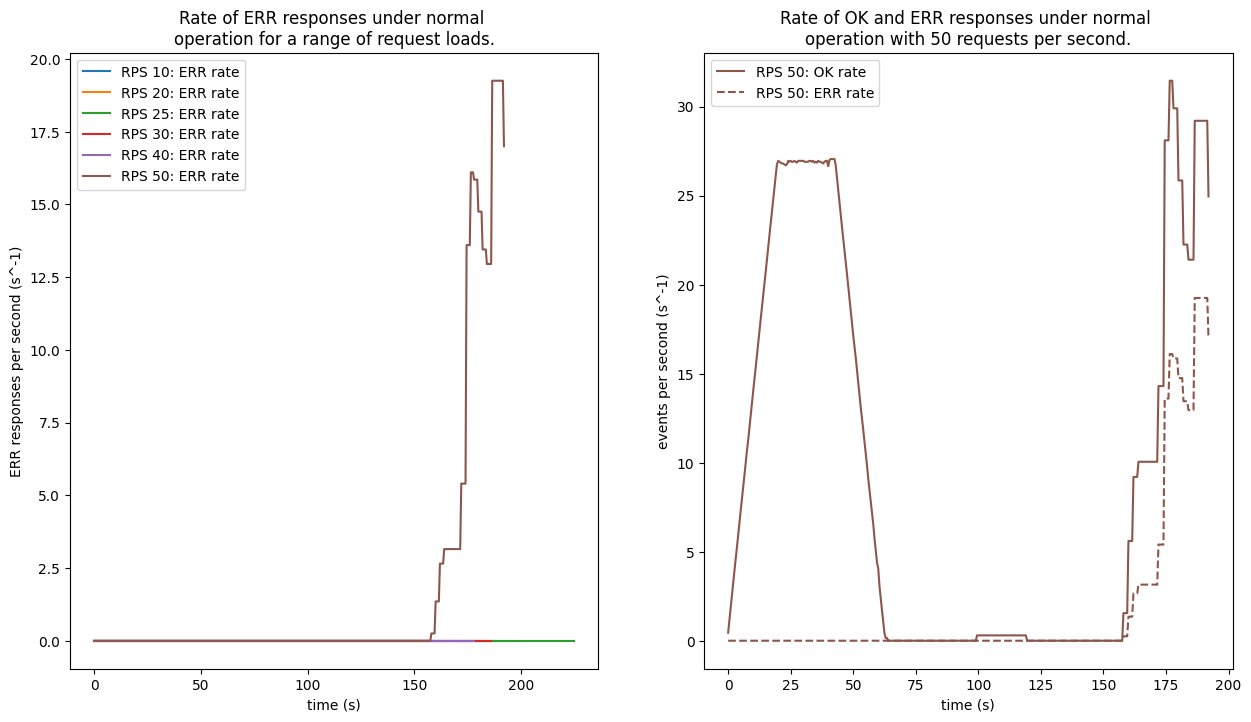

In [5]:
log_files = {
    "RPS 10" : LogFile(log_type=LogFileType.GOT, path="./logs/kleene/2024-10-28_13-44-55.433930.txt"),
    "RPS 20" : LogFile(log_type=LogFileType.GOT, path="./logs/kleene/2024-10-28_13-49-18.928926.txt"),
    "RPS 25" : LogFile(log_type=LogFileType.GOT, path="./logs/kleene/2024-10-28_14-09-30.488833.txt"),
    "RPS 30" : LogFile(log_type=LogFileType.GOT, path="./logs/kleene/2024-10-28_13-53-30.087870.txt"),
    "RPS 40" : LogFile(log_type=LogFileType.GOT, path="./logs/kleene/2024-10-28_13-57-54.831539.txt"),
    "RPS 50" : LogFile(log_type=LogFileType.GOT, path="./logs/kleene/2024-10-28_14-05-07.122868.txt"),
}

log_50_only = {
    "RPS 50" : LogFile(log_type=LogFileType.GOT, path="./logs/kleene/2024-10-28_14-05-07.122868.txt", kwargs={'color':'tab:brown'}),
}
err_roller = Roller("ERR rate", fn.count_err, rate=True)

both_rollers = [
    Roller("OK rate", fn.count_ok, rate=True),
   Roller("ERR rate", fn.count_err, rate=True,kwargs={'linestyle':'--'}) 
]

fig,axes = plot_utils.fig(subplots=(1,2), figs=[
    Fig(title='Rate of ERR responses under normal \noperation for a range of request loads.', x='time (s)', y='ERR responses per second (s^-1)'),
    Fig(title='Rate of OK and ERR responses under normal \noperation with 50 requests per second.', x='time (s)',y='events per second (s^-1)')])
# fig1
plot_utils.overlay_rolling(axes[0],log_files,[err_roller],window_secs=WINDOW_LEN_SECS, const_stride_secs=0.5, zeroed_times=True)

#fig2
plot_utils.overlay_rolling(axes[1],log_50_only,both_rollers,window_secs=WINDOW_LEN_SECS, const_stride_secs=0.5, zeroed_times=True)

[ax.legend() for ax in axes]
fig.show()